#Introduction to Dataset, DataLoader and Torchvision

In [1]:
#@markdown ---------------
#@markdown ## **⚠️❗ Ejecute esta celda para descargar Shoes dataset❗⚠️**
#@markdown ### Esta celda creará la carpeta ```/content/shoes_data```

!pip install -qq gdown
!gdown -qq "https://drive.google.com/uc?id=1_fIMm5nPp0BLJZKfkJZ_juRmLpRK4iA0" -O /shoes_data.zip
!mkdir /content/shoes_data/
!unzip -qq /shoes_data.zip -d /content/shoes_data
!rm -r /shoes_data.zip
print ("Done!")
#@markdown ---------------

Done!


In [5]:
import torch
from torch import nn
from torchsummary import summary
from torchvision import datasets
from torchvision import transforms as T
from torch.utils.data import DataLoader

from PIL import Image
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
#---- Importar librerias. Incluya acá todas las librerías que requiera
train_dataset = datasets.ImageFolder(root= '/content/shoes_data/train' )
test_dataset = datasets.ImageFolder(root= '/content/shoes_data/test' )

0


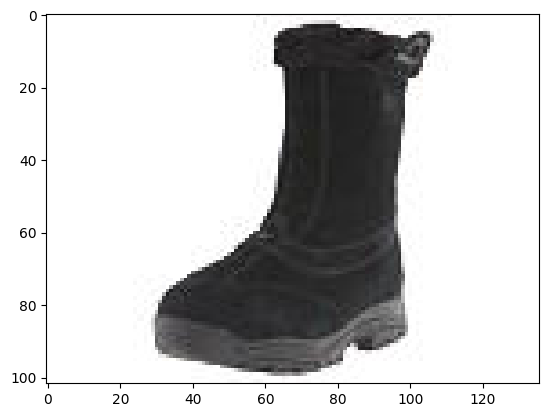

In [11]:
print ( train_dataset[4][1] )
plt.imshow( train_dataset[4][0] )

In [12]:
def plot_images(imgs, grid_size = (5,5)):
    #
    _, axs = plt.subplots(grid_size[0], grid_size[1], figsize = (grid_size[0]*3, grid_size[1]*3))
    axs = axs.ravel()

    for i, (img, ax) in enumerate(zip(imgs, axs)):
      ax.imshow( img, cmap = 'gray' )
      ax.set_axis_off()

    plt.tight_layout()

In [ ]:
# original_img = []
# for i in range (9):
#   original_img.append(train_dataset[i][0])

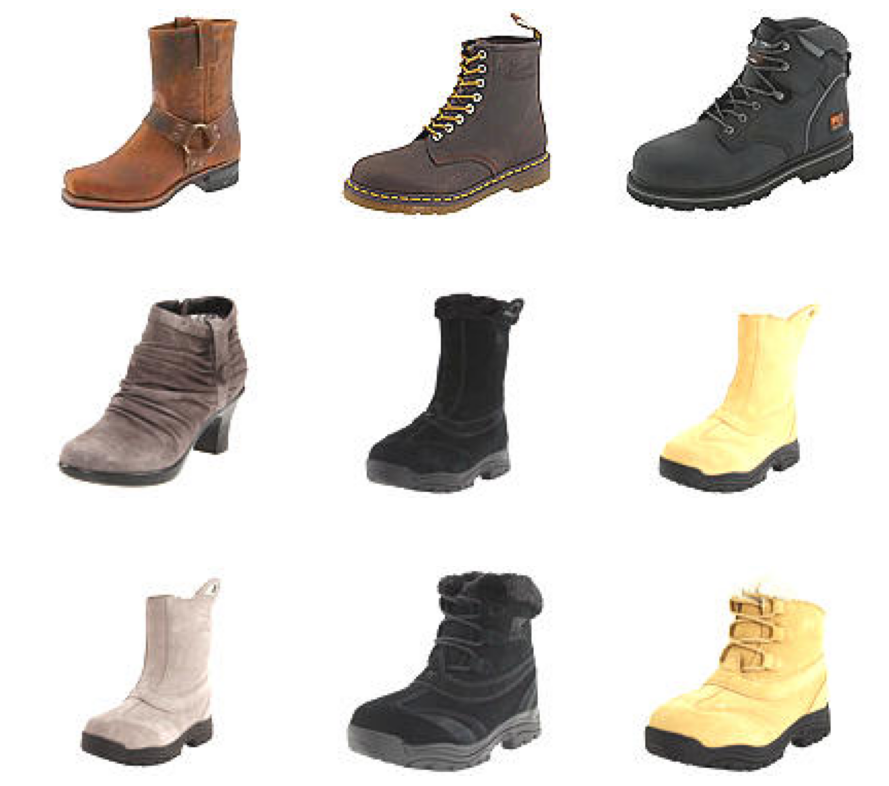

In [13]:
original_imgs = [train_dataset[i][0] for i in range(9)]
plot_images (original_imgs, grid_size = (3,3))

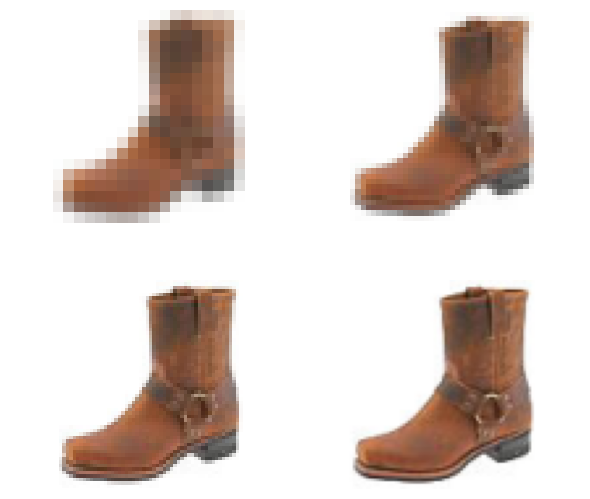

In [14]:
resized_imgs = [ T.Resize(size=size)( train_dataset[0][0] ) for size in (20,40,60,80)]
plot_images (resized_imgs, grid_size = (2,2))

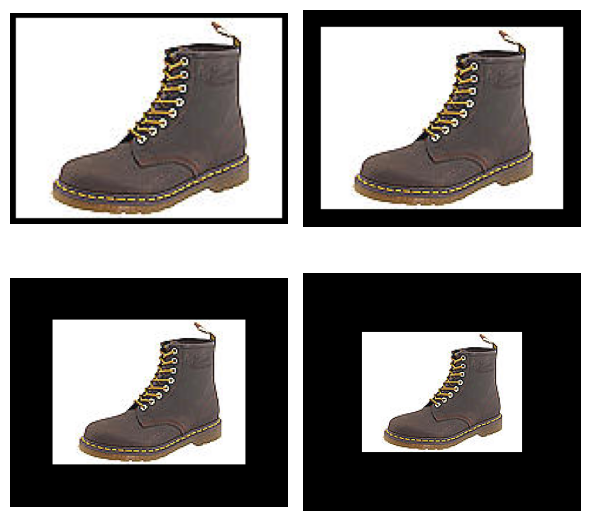

In [16]:
padded_imgs = [T.Pad(padding=padding)( train_dataset[1][0] )  for padding in (3, 10, 30, 50)]
plot_images (padded_imgs, grid_size = (2,2))

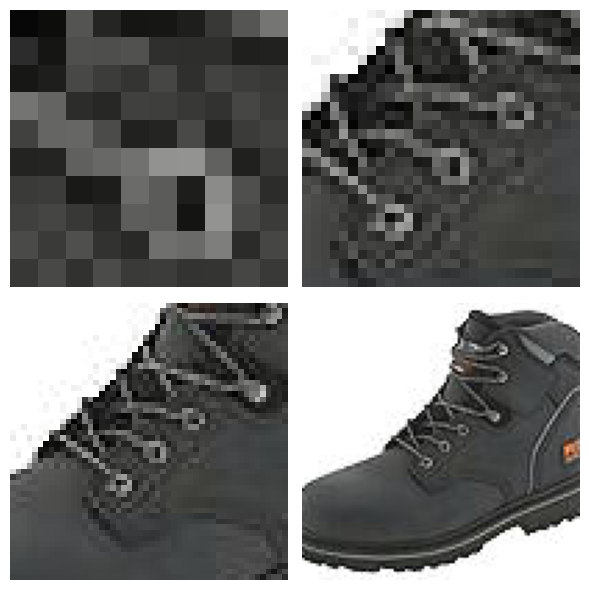

In [18]:
center_crops = [T.CenterCrop(size=size)( train_dataset[2][0] ) for size in (10, 30, 50, 100)]
plot_images (center_crops, grid_size = (2,2))

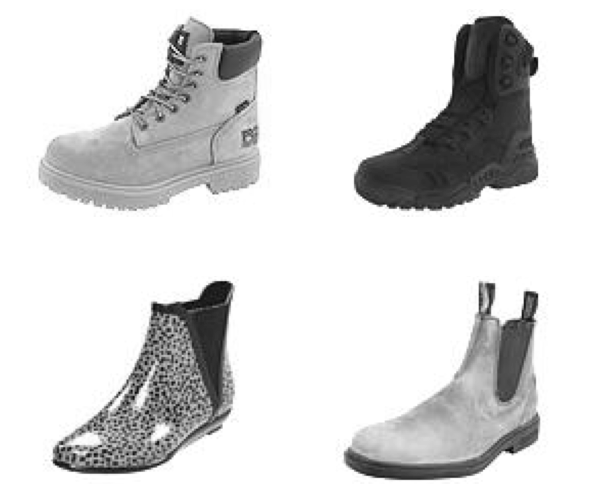

In [20]:
grayscale_imgs = [T.Grayscale()( train_dataset[i][0] ) for i in range(201,205)]
plot_images (grayscale_imgs, grid_size = (2,2))

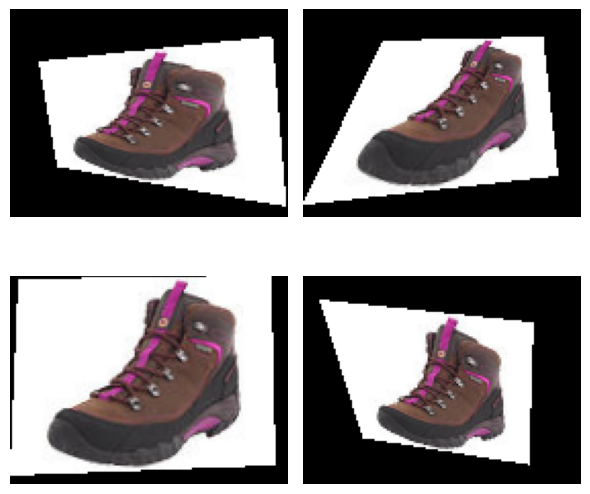

In [24]:
persp_imgs = [T.RandomPerspective(distortion_scale=0.6, p=1.0)( train_dataset[50][0] ) for i in range(4)]
plot_images (persp_imgs, grid_size = (2,2))

## Create a dataloader

In [27]:
image_transforms = T.Compose([T.Resize((64,64), Image.BICUBIC),
                                        T.Grayscale(),
                                       T.ToTensor()])

In [31]:
#---- Importar librerias. Incluya acá todas las librerías que requiera
train_dataset = datasets.ImageFolder(root= '/content/shoes_data/train' , transform = image_transforms )
test_dataset = datasets.ImageFolder(root= '/content/shoes_data/test' , transform = image_transforms )

print(train_dataset[0][0].shape)

torch.Size([1, 64, 64])


In [32]:
train_loader = DataLoader(train_dataset, batch_size= 200 , shuffle=True)
test_loader = DataLoader(test_dataset, batch_size= 200 )

In [33]:
trainBatch = next(iter(train_loader))
valBatch = next(iter(test_loader))

In [35]:
print (trainBatch[0].shape)

torch.Size([200, 1, 64, 64])


In [36]:
for i, (batch_X, batch_y) in enumerate(train_loader):
    print(batch_X.shape, batch_y.shape)
    if i > 5: break

torch.Size([200, 1, 64, 64]) torch.Size([200])
torch.Size([200, 1, 64, 64]) torch.Size([200])
torch.Size([200, 1, 64, 64]) torch.Size([200])
torch.Size([200, 1, 64, 64]) torch.Size([200])
torch.Size([200, 1, 64, 64]) torch.Size([200])
torch.Size([200, 1, 64, 64]) torch.Size([200])
torch.Size([200, 1, 64, 64]) torch.Size([200])
